In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=(12,6)
%matplotlib inline
!pip install missingno
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_excel("Diabetes-Modified .xlsx")
dfDemographics=pd.read_excel("Diabetes-Modified .xlsx","Demographics in V2 and V8")
dfMedicationHistory=pd.read_excel("Diabetes-Modified .xlsx","Medical and Medication History ")
dfLabTests=pd.read_excel("Diabetes-Modified .xlsx","Lab Tests in V2 and V8")
dfMRI=pd.read_excel("Diabetes-Modified .xlsx","MRI Tests in V2 and V8")
dfCognitive=pd.read_excel("Diabetes-Modified .xlsx","Cognitive Tests")

In [3]:
df.head(10)
df.shape

(121, 1317)

In [4]:
dfDemographics.head(10)
dfDemographics.shape

(121, 10)

In [5]:
dfMedicationHistory.head(10)
dfMedicationHistory.shape

(121, 65)

In [6]:
dfLabTests.head(10)
dfLabTests.shape

(121, 170)

In [7]:
dfMRI.head(10)
dfMRI.shape

(121, 1010)

In [8]:
dfCognitive.head(10)
dfCognitive.shape

(121, 66)

In [9]:
df.tail(5)

,PatientID_x,Visit_x,Group,Diabetes Duration,HTN or not,Race,"DM, Non-DM, STROKE",HEIGHT (M),MASS (KG),BMI,...,Clock: Total Score,Clock: Standard Score,WTAR: Raw Score,WTAR: Std Score,NIS Self-Report Form Total Response,BADS Total Responses,GDS Total Response,IADL,MMSE Total,MMSE: Comp Norms
116,S0600,8.0,CONTROL,NaN,ntn,White,Non-DM,1.62,83.0,31.600000,...,7.0,NaN,45.0,119.0,84.0,23.0,17.0,27.0,29.0,100.0
117,S0601,2.0,DM,6.0,HTN,White,DM,1.80,90.6,27.962963,...,6.0,NaN,45.0,119.0,72.0,14.0,9.0,27.0,28.0,100.0
118,S0608,2.0,DM,22.0,HTN,White,DM,1.76,85.2,27.505165,...,7.0,NaN,40.0,111.0,NaN,10.0,1.0,NaN,26.0,91.0
119,S0608,8.0,DM,24.0,HTN,White,DM,1.77,83.9,26.800000,...,8.0,NaN,43.0,116.0,37.0,8.0,5.0,26.0,27.0,27.0
120,S0610,2.0,DM,21.0,HTN,White,DM,1.60,75.6,29.531250,...,7.0,NaN,42.0,115.0,142.0,20.0,16.0,26.0,26.0,91.0


In [10]:
(row,column) = df.shape

In [11]:
row

121

In [12]:
column

1317

In [13]:
#creates a tuple
df.shape

(121, 1317)

In [14]:
df.info()
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Columns: 1317 entries, PatientID_x to MMSE: Comp Norms
dtypes: float64(1226), object(91)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 1317 columns):
 #     Column                                                                                Non-Null Count  Dtype  
---    ------                                                                                --------------  -----  
 0     PatientID_x                                                                           121 non-null    object 
 1     Visit_x                                                                               121 non-null    float64
 2     Group                                                                                 121 non-null    object 
 3     Diabetes Duration                                                                     64 non-null     float64
 4     H

In [15]:
df.describe(include='all')

,PatientID_x,Visit_x,Group,Diabetes Duration,HTN or not,Race,"DM, Non-DM, STROKE",HEIGHT (M),MASS (KG),BMI,...,Clock: Total Score,Clock: Standard Score,WTAR: Raw Score,WTAR: Std Score,NIS Self-Report Form Total Response,BADS Total Responses,GDS Total Response,IADL,MMSE Total,MMSE: Comp Norms
count,121,121.000000,121,64.000000,117,121,121,121.000000,121.000000,121.000000,...,120.000000,0.0,115.000000,103.000000,92.000000,116.000000,108.000000,104.000000,118.000000,116.000000
unique,77,NaN,2,NaN,2,7,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,S0030,NaN,DM,NaN,HTN,White,DM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,65,NaN,61,92,65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.181818,NaN,13.859375,NaN,NaN,NaN,1.664983,76.332314,27.009245,...,6.916667,NaN,39.434783,110.805825,69.543478,14.284483,6.685185,26.067308,28.432203,101.353448
std,NaN,2.898275,NaN,7.302679,NaN,NaN,NaN,0.092245,17.575718,6.193055,...,1.149229,NaN,8.881412,13.627436,54.739827,9.589674,7.110146,1.850030,1.790186,19.482547
min,NaN,2.000000,NaN,5.000000,NaN,NaN,NaN,1.512000,44.000000,0.001965,...,2.000000,NaN,13.000000,71.000000,0.000000,0.000000,0.000000,13.000000,23.000000,27.000000
25%,NaN,2.000000,NaN,8.000000,NaN,NaN,NaN,1.600000,63.100000,23.320000,...,6.000000,NaN,33.500000,103.000000,29.000000,8.000000,1.000000,26.000000,27.000000,91.000000
50%,NaN,2.000000,NaN,12.000000,NaN,NaN,NaN,1.640000,73.300000,26.798590,...,7.000000,NaN,42.000000,114.000000,47.000000,13.000000,4.000000,27.000000,29.000000,108.000000
75%,NaN,8.000000,NaN,18.250000,NaN,NaN,NaN,1.730000,87.800000,30.585938,...,8.000000,NaN,47.000000,123.000000,94.500000,18.250000,9.250000,27.000000,30.000000,115.000000


In [16]:
df.dtypes

PatientID_x              object
Visit_x                 float64
Group                    object
Diabetes Duration       float64
HTN or not               object
                         ...   
BADS Total Responses    float64
GDS Total Response      float64
IADL                    float64
MMSE Total              float64
MMSE: Comp Norms        float64
Length: 1317, dtype: object

In [17]:
df.nunique()

PatientID_x             77
Visit_x                  2
Group                    2
Diabetes Duration       22
HTN or not               2
                        ..
BADS Total Responses    34
GDS Total Response      24
IADL                     8
MMSE Total               8
MMSE: Comp Norms        40
Length: 1317, dtype: int64

In [18]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)

In [19]:
df.count()

PatientID_x                                                                             121
Visit_x                                                                                 121
Group                                                                                   121
Diabetes Duration                                                                        64
HTN or not                                                                              117
Race                                                                                    121
DM, Non-DM, STROKE                                                                      121
HEIGHT (M)                                                                              121
MASS (KG)                                                                               121
BMI                                                                                     121
Unnamed: 10                                                                     

************************* HANDLING MISSING VALUE - DEMOGRAPHICS ***********************

In [20]:
#MISSING VALUE DEMOGRAPHICS change HTN or not column to mode value 
#modeHTN=df["HTN or not"].mode()
#modeHTN
dfDemographics['HTN or not'].fillna(dfDemographics['HTN or not'].mode()[0],inplace=True)

In [21]:
dfDemographics['HTN or not'].value_counts()

HTN    65
ntn    56
Name: HTN or not, dtype: int64

In [22]:
#df.iloc[:,0:4]
#df[df["Group"]=='CONTROL']
#MISSING VALUE DEMOGRAPHICS Diabetes Duration where group == control to 0 value 
dfDemographics.loc[dfDemographics['Group']=='CONTROL','Diabetes Duration']= 0
dfDemographics[{'Diabetes Duration','Group'}][dfDemographics["Group"]=='CONTROL']



,Group,Diabetes Duration
0,CONTROL,0.0
1,CONTROL,0.0
2,CONTROL,0.0
3,CONTROL,0.0
4,CONTROL,0.0
6,CONTROL,0.0
7,CONTROL,0.0
8,CONTROL,0.0
9,CONTROL,0.0
10,CONTROL,0.0


In [23]:
#MISSING VALUE DEMOGRAPHICS Diabetes Duration mean value 
meanDiabetesDuration = dfDemographics['Diabetes Duration'].mean()
meanDiabetesDuration
dfDemographics['Diabetes Duration'].replace(np.NaN,meanDiabetesDuration,inplace=True)


In [24]:
#drop empty columns with all null values 
dfDemographics1=dfDemographics.dropna(how='all',axis=1)
dfDemographics1.isnull().sum()

PatientID_x           0
Visit_x               0
Group                 0
Diabetes Duration     0
HTN or not            0
Race                  0
DM, Non-DM, STROKE    0
HEIGHT (M)            0
MASS (KG)             0
BMI                   0
dtype: int64

************************* HANDLING MISSING VALUE - MEDICATION HISTORY ***********************

In [25]:
dfMedicationHistory.shape #65 empty columns 

dfMedicationHistory1=dfMedicationHistory.dropna(how='all',axis=1)
dfMedicationHistory1.isnull().sum()

dfMedicationHistory1.shape #0 empty columns

(121, 47)

In [26]:
dfMedicationHistory1.sort_values(by='PatientID_x')
dfMedicationHistory1.value_counts(subset='PREVIOUS TOBACCO USE_x')


PREVIOUS TOBACCO USE_x
No     54
Yes    50
no      3
dtype: int64

In [27]:
le = LabelEncoder()
dfMedicationHistory1['PREVIOUS TOBACCO USE_x'] = le.fit_transform(dfMedicationHistory1['PREVIOUS TOBACCO USE_x'])
newdf=dfMedicationHistory1
newdf

C:\Users\vinit\AppData\Local\Temp/ipykernel_68848/1971500776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMedicationHistory1['PREVIOUS TOBACCO USE_x'] = le.fit_transform(dfMedicationHistory1['PREVIOUS TOBACCO USE_x'])


,PatientID_x,"DM, Non-DM, STROKE",PREVIOUS TOBACCO USE_x,CURRENT TOBACCO USE_x,PackYears_x,Years_x,PREVIOUS ALCOHOL USE_x,CURRENT ALCOHOL USE_x,ALCOHOL Dose/Week_x,Dizziness AUTONOMIC SYMPTOMS_x,...,STATINS_x,ESTROGEN_x,ACE INHIBITORS_x,ARBS_x,BETA BLOCKERS_x,DIURETICS_x,CA ++ BLOCKERS_x,INSULIN(Yes_or_No)_x,ORAL HYPOGLYCEMIC_x,OTHER 2_x
0,S0030,Non-DM,0,No,NaN,NaN,NaN,Yes,2.00,NO,...,N,N,N,N,N,N,N,N,N,N
1,S0033,Non-DM,1,No,40.000,40.0,Yes,Yes,1.00,NO,...,N,N,N,N,N,N,N,N,N,Y
2,S0064,Non-DM,0,No,NaN,NaN,Yes,Yes,0.00,NO,...,Y,N,N,N,N,N,N,N,N,Y
3,S0068,Non-DM,3,No,NaN,NaN,NaN,No,0.00,NO,...,N,N,N,N,N,N,N,N,N,Y
4,S0078,Non-DM,0,No,NaN,NaN,Yes,Yes,0.00,NO,...,N,N,N,N,N,N,N,N,N,Y
5,S0105,DM,1,No,12.500,25.0,Yes,No,15.00,NO,...,N,N,Y,N,Y,N,N,Y,Y,Y
6,S0153,Non-DM,0,No,NaN,NaN,No,No,0.00,NO,...,N,N,N,N,N,N,N,N,N,Y
7,S0166,Non-DM,0,No,NaN,NaN,Yes,Yes,0.00,NO,...,Y,N,N,N,N,N,N,N,N,N
8,S0174,Non-DM,0,No,NaN,NaN,No,No,0.00,NO,...,N,N,N,N,N,N,Y,N,N,Y
9,S0187,Non-DM,0,No,NaN,NaN,Yes,Yes,4.00,NO,...,N,N,N,N,N,N,N,N,N,Y


************************* HANDLING MISSING VALUE - LAB TESTS ***********************

In [28]:
dfLabTests1=dfLabTests.dropna(how='all',axis=1)
dfLabTests1.isnull().sum()



PatientID_x                                                      0
DM, Non-DM, STROKE                                               0
PREVIOUS TOBACCO USE_y                                          14
CURRENT TOBACCO USE_y                                            0
PackYears_y                                                     68
Years_y                                                         68
PREVIOUS ALCOHOL USE_y                                          16
CURRENT ALCOHOL USE_y                                            1
ALCOHOL Dose/Week_y                                              6
Dizziness AUTONOMIC SYMPTOMS_y                                   0
Numbness AUTONOMIC SYMPTOMS_y                                    2
Painful feet AUTONOMIC SYMPTOMS_y                                0
Syncope AUTONOMIC SYMPTOMS_y                                     1
OH AUTONOMIC SYMPTOMS_y                                          0
cancer,# FAMILY HISTORY_y                                     

************************* HANDLING MISSING VALUE - MRI  ***********************

In [29]:
dfMRI1=dfMRI.dropna(how='all',axis=1)
dfMRI1.isnull().sum()


PatientID_x                                                                               0
DM, Non-DM, STROKE                                                                        0
global GM vol                                                                             6
global GM vol covered in template                                                         6
L superior frontal gyrus (#21) GM                                                         6
R superior frontal gyrus (#22) GM                                                         6
L middle frontal gyrus (#23) GM                                                           6
R middle frontal gyrus (#24) GM                                                           6
L inferior frontal gyrus (#25) GM                                                         6
R inferior frontal gyrus (#26) GM                                                         6
L precentral gyrus (#27) GM                                                     

************************* HANDLING MISSING VALUE - COGNITIVE ***********************

In [30]:
dfCognitive1=dfCognitive.dropna(how='all',axis=1)
dfCognitive1.isnull().sum()

PatientID_x                             0
DM, Non-DM, STROKE                      0
DS: # digits correct forward            4
DS: backward # digits correct           3
DS: Total                               4
DS: Scaled Score                        4
HVLT: Trial 1                           0
HVLT: Trial 2                           0
HVLT: Trial 3                           0
HVLT: Trial 4                          46
HVLT: True-Positive                    11
HVLT: Sem-Rel False-Pos                11
HVLT: Sem-Unrel False-Pos              11
HVLT: Total False-Pos                  11
HVLT: Total Recall                      0
HVLT: Delayed Recall                    1
HVLT: Delayed Recall T-score            1
HVLT: Retention %                       1
HVLT: Retention % T-score               1
HVLT: RDI                               3
HVLT: RDI T-score                       3
RCFT: Copy-Raw                          1
RCFT: Copy Time (sec)                   2
RCFT: I.R.-Raw                    

MISSING NUMBERS LIBRARY 
Python has a library named missingno which provides a few graphs that let us visualize missing data from a 
different perspective. This can help us a lot in the handling of missing data.
The missingno library is based on matplotlib.It has 4 plot as of now for the understanding distribution of missing data in our dataset:
#1.Bar Chart: It displays a count of values present per columns ignoring missing values
#2.Matrix: The nullity matrix chart lets us understand the distribution of data within the whole dataset in all columns at the same time which can help us understand the distribution of data better. It also displays sparkline which highlights rows with maximum and minimum nullity in a dataset.
#3.Heatmap: The chart displays nullity correlation between columns of the dataset. It lets us understand how the missing value of one column is related to missing values in other columns.
#4.Dendrogram: The dendrogram like heatmap groups columns based on nullity relation between them. It groups columns together where there is more nullity relation.


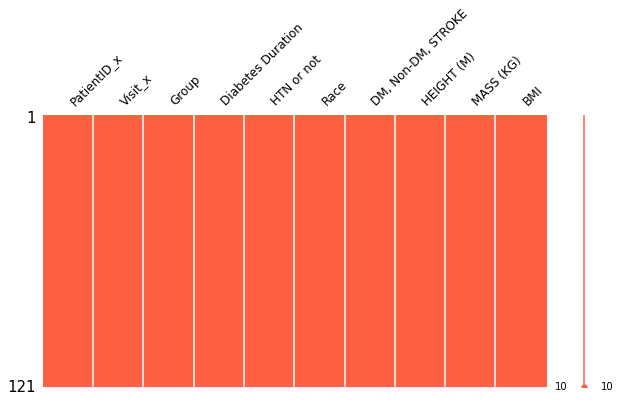

In [31]:
#msno.bar(dfDemographics, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);
msno.matrix(dfDemographics, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));
#wont show as all missing values are handled
#msno.heatmap(dfDemographics, cmap="RdYlGn", figsize=(10,5), fontsize=12); 
#msno.dendrogram(dfDemographics, figsize=(10,5), fontsize=12);

In [32]:
#msno.bar(dfMedicationHistory, color="dodgerblue", sort="ascending", figsize=(200,100), fontsize=100);
#msno.matrix(dfMedicationHistory1, figsize=(200,100), fontsize=100, color=(1, 0.38, 0.27));
msno.heatmap(dfMedicationHistory, cmap="RdYlGn", figsize=(200,100), fontsize=100); 
#msno.dendrogram(dfMedicationHistory1, figsize=(200,100), fontsize=100);

In [33]:
dfMedicationHistory

,PatientID_x,"DM, Non-DM, STROKE",PREVIOUS TOBACCO USE_x,CURRENT TOBACCO USE_x,PackYears_x,Years_x,PREVIOUS ALCOHOL USE_x,CURRENT ALCOHOL USE_x,ALCOHOL Dose/Week_x,Dizziness AUTONOMIC SYMPTOMS_x,...,STATINS_x,ESTROGEN_x,ACE INHIBITORS_x,ARBS_x,BETA BLOCKERS_x,DIURETICS_x,CA ++ BLOCKERS_x,INSULIN(Yes_or_No)_x,ORAL HYPOGLYCEMIC_x,OTHER 2_x
0,S0030,Non-DM,No,No,NaN,NaN,NaN,Yes,2.00,NO,...,N,N,N,N,N,N,N,N,N,N
1,S0033,Non-DM,Yes,No,40.000,40.0,Yes,Yes,1.00,NO,...,N,N,N,N,N,N,N,N,N,Y
2,S0064,Non-DM,No,No,NaN,NaN,Yes,Yes,0.00,NO,...,Y,N,N,N,N,N,N,N,N,Y
3,S0068,Non-DM,NaN,No,NaN,NaN,NaN,No,0.00,NO,...,N,N,N,N,N,N,N,N,N,Y
4,S0078,Non-DM,No,No,NaN,NaN,Yes,Yes,0.00,NO,...,N,N,N,N,N,N,N,N,N,Y
5,S0105,DM,Yes,No,12.500,25.0,Yes,No,15.00,NO,...,N,N,Y,N,Y,N,N,Y,Y,Y
6,S0153,Non-DM,No,No,NaN,NaN,No,No,0.00,NO,...,N,N,N,N,N,N,N,N,N,Y
7,S0166,Non-DM,No,No,NaN,NaN,Yes,Yes,0.00,NO,...,Y,N,N,N,N,N,N,N,N,N
8,S0174,Non-DM,No,No,NaN,NaN,No,No,0.00,NO,...,N,N,N,N,N,N,Y,N,N,Y
9,S0187,Non-DM,No,No,NaN,NaN,Yes,Yes,4.00,NO,...,N,N,N,N,N,N,N,N,N,Y


The values 1.5 x IQR (interquartile range) higher / smaller than Q3 / Q1 are called outliers. 
IQR is the difference between Q3 and Q1 (IQR = Q3-Q1).
One way to treat outliers is to make them equal to Q3 or Q1. By using pandas and numpy libraries,
the below function does this task. Here. lower_upper_range function finds the range whose outside are outliers. Then with numpy clip function the values are clipped to the ranges.



In [1]:
def number_of_outliers(df):
    
    df = df.select_dtypes(exclude = 'object')
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

def lower_upper_range(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
  
for col in columns:  
    lowerbound,upperbound = lower_upper_range(df[col])
    df[col]=np.clip(df[col],a_min=lowerbound,a_max=upperbound)